# 🚀RETAIL SALES-DATA CLEANING AND OUTLIER HANDLING


## ⚠️ PROBLEM STATEMENT
Retail transaction data collected from real-world sources is often messy and inconsistent. It may contain missing values, duplicate entries, incorrect formats, or unusually extreme values that reduce data reliability. If such issues are not handled properly, they can lead to inaccurate analysis and misleading conclusions. Therefore, it becomes important to carefully clean and organize the data so that it is reliable and consistent

## 🎯 OBJECTIVE

- Identify missing values and improve data completeness  
- Remove duplicate records for better accuracy  
- Detect and handle outliers using statistical methods  
- Improve overall data consistency and reliability  
- Prepare dataset for analysis and future ML applications

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
df=pd.read_csv("retail_store_sales_uncleaned.csv")
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,NAN,NAN,NAN,NAN,NaN,NaN,NaN,NAN,NAN,NAN,NAN
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


## 📊DATA OVERVIEW

In [24]:
df.shape

(13833, 11)

In [25]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')

In [26]:
df.dtypes

Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied     object
dtype: object

In [27]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11368.000000,11369.000000,11369.000000
mean,29.038644,6.874042,160.519434
std,24.663735,5.966900,153.673698
min,5.000000,1.000000,5.000000
25%,15.500000,3.000000,55.500000
50%,24.500000,6.000000,114.000000
75%,33.500000,8.000000,210.000000
max,116.942638,27.648815,647.218856


## ⚙️ DATA STANDARDIZATION AND FORMAT CORRECTION 

In [28]:
df.columns = df.columns.str.strip().str.replace(" ", "_", regex=False)

In [29]:
df.columns

Index(['Transaction_ID', 'Customer_ID', 'Category', 'Item', 'Price_Per_Unit',
       'Quantity', 'Total_Spent', 'Payment_Method', 'Location',
       'Transaction_Date', 'Discount_Applied'],
      dtype='object')

In [30]:
df["Transaction_Date"]=pd.to_datetime(df["Transaction_Date"],errors="coerce")
df.dtypes

Transaction_ID              object
Customer_ID                 object
Category                    object
Item                        object
Price_Per_Unit             float64
Quantity                   float64
Total_Spent                float64
Payment_Method              object
Location                    object
Transaction_Date    datetime64[ns]
Discount_Applied            object
dtype: object

In [31]:
Category_columns = df.select_dtypes(include='object').columns
Exclude_columns = ['Discount_Applied','Transaction_ID','Customer_ID']
clean_columns = [col for col in Category_columns if col not in Exclude_columns]
for col in clean_columns:
    df[col] = df[col].str.lower().str.strip()

In [32]:
df.head()

,Transaction_ID,Customer_ID,Category,Item,Price_Per_Unit,Quantity,Total_Spent,Payment_Method,Location,Transaction_Date,Discount_Applied
0,NAN,NAN,nan,nan,NaN,NaN,NaN,nan,nan,NaT,NAN
1,TXN_3731986,CUST_22,milk products,item_17_milk,29.0,9.0,261.0,digital wallet,online,2023-07-23,True
2,TXN_9303719,CUST_02,butchers,item_12_but,21.5,2.0,43.0,credit card,online,2022-10-05,False
3,TXN_9458126,CUST_06,beverages,item_16_bev,27.5,9.0,247.5,credit card,online,2022-05-07,NaN
4,TXN_4575373,CUST_05,food,item_6_food,12.5,7.0,87.5,digital wallet,online,2022-10-02,False


## 🔍HANDLING MISSING VALUES

In [33]:
df.isnull().sum().sum()

np.int64(26770)

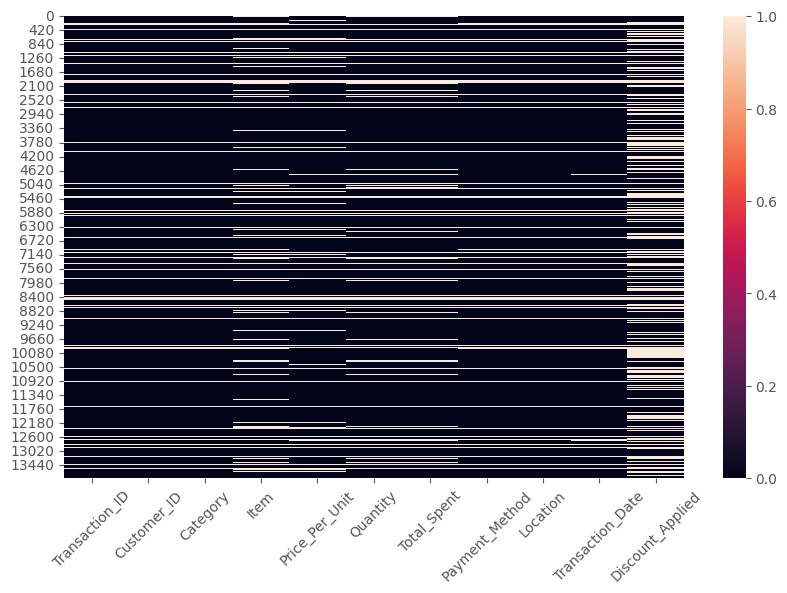

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar="verdis")
plt.xticks(rotation=45)
plt.show()

- Heatmap Shows distribution of null values in original dataset  
- Light areas → Missing values present  
- Dark areas → Valid data  
- Helped identify incomplete rows before cleaning

In [35]:
df.isnull().all(axis=1).sum()

np.int64(1727)

In [36]:
df[df.isnull().all(axis=1)]

,Transaction_ID,Customer_ID,Category,Item,Price_Per_Unit,Quantity,Total_Spent,Payment_Method,Location,Transaction_Date,Discount_Applied
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
13797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
13818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
13820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [37]:
df = df.dropna(how='all')

In [38]:
df.shape

(12106, 11)

- 1727 rows are completely empty. so sucessfully deleted it

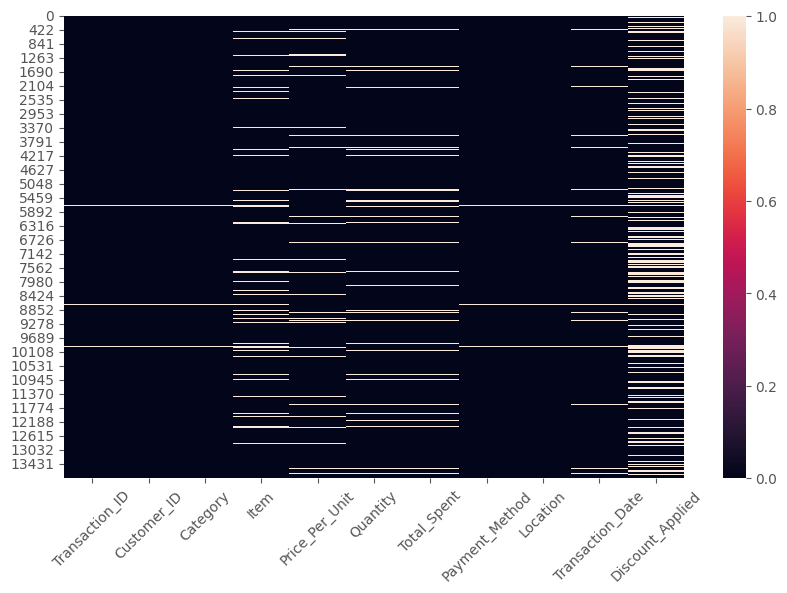

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar="verdis")
plt.xticks(rotation=45)
plt.show()

### Dataset After Removing Empty Rows

- **Rows Removed:** 1,727 (fully empty)  
- **Current Dataset Size:** 12,106 × 11 

In [40]:
df.isnull().sum(axis=1)

0        4
1        0
2        0
3        1
4        0
        ..
13827    0
13829    3
13830    1
13831    0
13832    0
Length: 12106, dtype: int64

In [41]:
row_missing_percent = (df.isnull().sum(axis=1) / df.shape[1]) * 100

In [42]:
df = df[row_missing_percent <= 70]
df.shape

(12008, 11)

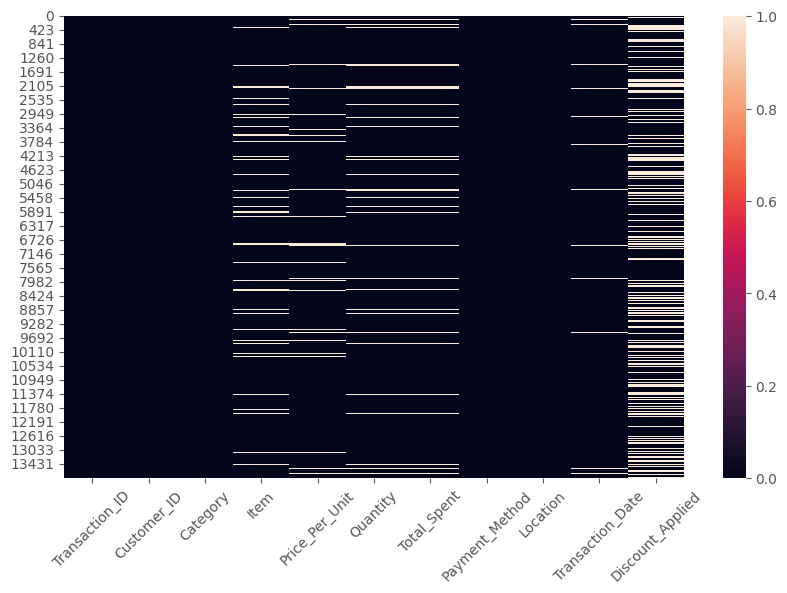

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.xticks(rotation=45)
plt.show()

### Removing Highly Incomplete Rows
- Rows with more than 70% missing values were removed.
- Nearly 98 rows are Removed

## 🧩FILLING MISSING VALUES

In [44]:
df.isnull().sum()

Transaction_ID         0
Customer_ID            0
Category               0
Item                1035
Price_Per_Unit       738
Quantity             737
Total_Spent          737
Payment_Method         0
Location               0
Transaction_Date     211
Discount_Applied    3531
dtype: int64

In [45]:
(df.isnull().sum() / len(df)) * 100

Transaction_ID       0.000000
Customer_ID          0.000000
Category             0.000000
Item                 8.619254
Price_Per_Unit       6.145903
Quantity             6.137575
Total_Spent          6.137575
Payment_Method       0.000000
Location             0.000000
Transaction_Date     1.757162
Discount_Applied    29.405396
dtype: float64

- percentage of null values by columns

In [46]:
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100

np.float64(5.291169523348071)

- overall percentage of null values

- #### Categorical columns are filled with median

In [47]:
fiil_columns = ['Price_Per_Unit', 'Quantity', 'Total_Spent']

for col in fiil_columns:
    df[col] = df[col].fillna(df[col].median())

In [48]:
df.isnull().sum()

Transaction_ID         0
Customer_ID            0
Category               0
Item                1035
Price_Per_Unit         0
Quantity               0
Total_Spent            0
Payment_Method         0
Location               0
Transaction_Date     211
Discount_Applied    3531
dtype: int64

- #### Categorical columns are filled with Mode

In [49]:
df['Item'] = df['Item'].fillna(df['Item'].mode()[0])

In [50]:
df['Discount_Applied'] = df['Discount_Applied'].fillna(False)

In [51]:
df.isnull().sum()

Transaction_ID        0
Customer_ID           0
Category              0
Item                  0
Price_Per_Unit        0
Quantity              0
Total_Spent           0
Payment_Method        0
Location              0
Transaction_Date    211
Discount_Applied      0
dtype: int64

In [52]:
df = df.dropna(subset=['Transaction_Date'])

- We removed rows with missing Transaction_Date because the transaction date is essential information for each record.
- Without a valid date:
  - It is impossible to know when the transaction occurred.
  - Time-based analysis (such as monthly sales trends or seasonal patterns) cannot be performed.
  - The record becomes incomplete and less reliable.`

In [53]:
df.isnull().sum()

Transaction_ID      0
Customer_ID         0
Category            0
Item                0
Price_Per_Unit      0
Quantity            0
Total_Spent         0
Payment_Method      0
Location            0
Transaction_Date    0
Discount_Applied    0
dtype: int64

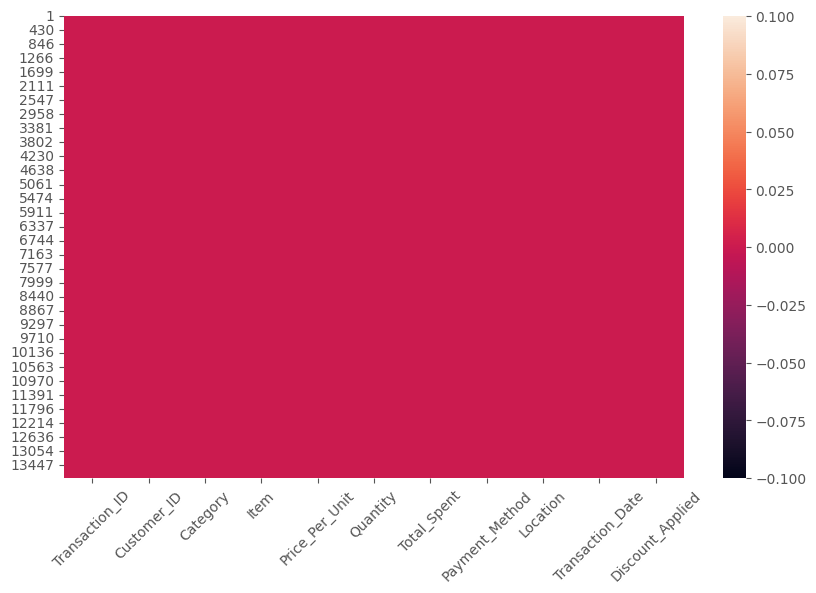

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar="verdis")
plt.xticks(rotation=45)
plt.show()

- This heatmap shows that there are no missing values remaining in the dataset after the data cleaning process. All columns appear uniformly colored, indicating that missing data has been successfully handled.

## 🗂️DUPLICATE HANDLING

In [55]:
df.duplicated().sum()

np.int64(823)

In [56]:
(df.duplicated().sum() / len(df)) * 100

np.float64(6.976349919471052)

- 823 rows are completely duplicated which is ~0.69% from the whole data which is minute

In [57]:
df.drop_duplicates(inplace=True,keep="first")

In [58]:
df.duplicated().sum()

np.int64(0)

- Fully duplicated rows were removed to prevent repeated records from distorting analysis while preserving valid multi-item transactions under the same Transaction ID.

## 🔍OUTLIERS DETECTION

In [59]:
df.describe()

,Price_Per_Unit,Quantity,Total_Spent,Transaction_Date
count,10974.000000,10974.000000,10974.000000,10974
mean,28.243076,6.709957,155.245521,2023-07-13 01:04:02.099507968
min,5.000000,1.000000,5.000000,2022-01-01 00:00:00
25%,15.500000,3.000000,57.000000,2022-10-01 00:00:00
50%,24.500000,6.000000,112.500000,2023-07-12 00:00:00
75%,33.500000,8.000000,201.000000,2024-04-23 00:00:00
max,116.942638,27.648815,647.218856,2025-01-18 00:00:00
std,23.202099,5.621119,146.084295,NaN


- Outlier treatment focused on Price_Per_Unit and Total_Spent as they directly impact monetary analysis. Quantity outliers were retained because bulk purchases are common in retail datasets.

### Outliers Detection And Removing By **IQR** Method

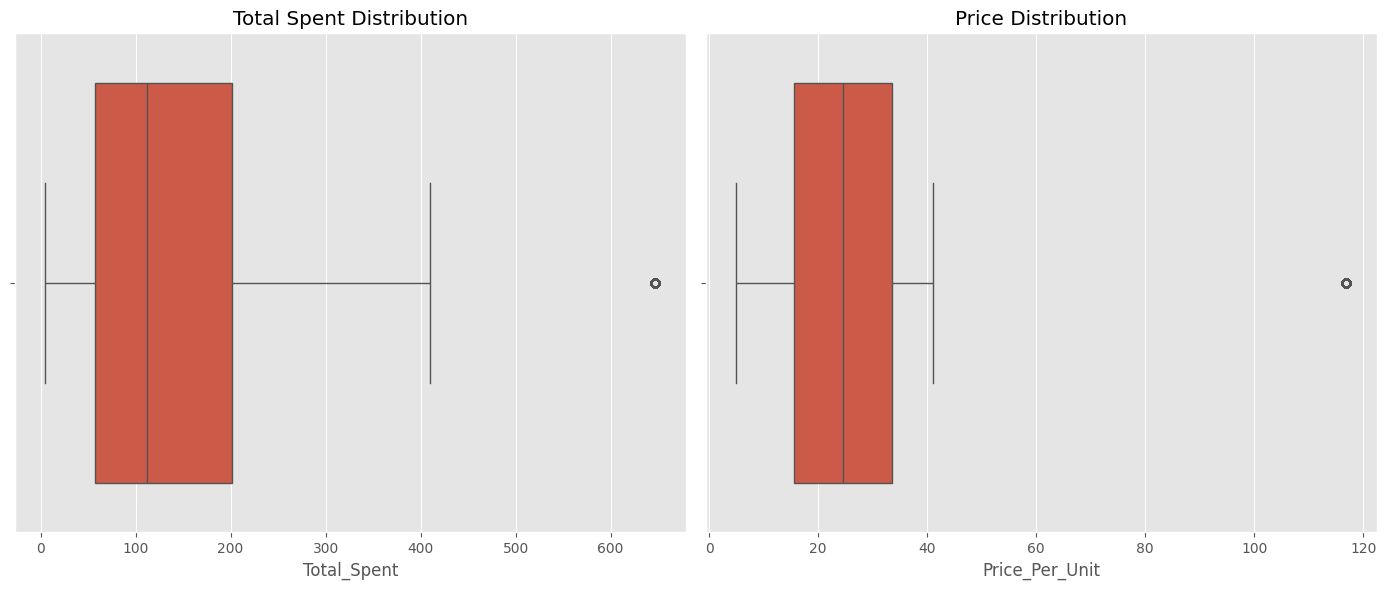

In [60]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x=df['Total_Spent'])
plt.title("Total Spent Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=df['Price_Per_Unit'])
plt.title("Price Distribution")

plt.tight_layout()
plt.show()

- Both Total_Spent and Price_Per_Unit show right-skewed distributions, indicating a few high-value transactions.
- Most transactions fall within a moderate price and spending range, suggesting typical retail purchase behavior.
- A small number of extreme values were detected, which may represent bulk purchases, premium products, or data anomalies.
- Identifying these outliers helps prevent distortion in statistical analysis and improves overall data reliability

In [61]:
df_iqr=df.copy()

In [62]:
df_iqr.shape

(10974, 11)

In [63]:
Q1 = df_iqr['Total_Spent'].quantile(0.25)
Q3 = df_iqr['Total_Spent'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_iqr = df_iqr[(df_iqr['Total_Spent'] >= lower) &(df_iqr['Total_Spent'] <= upper)]

In [64]:
df_iqr.shape

(10399, 11)

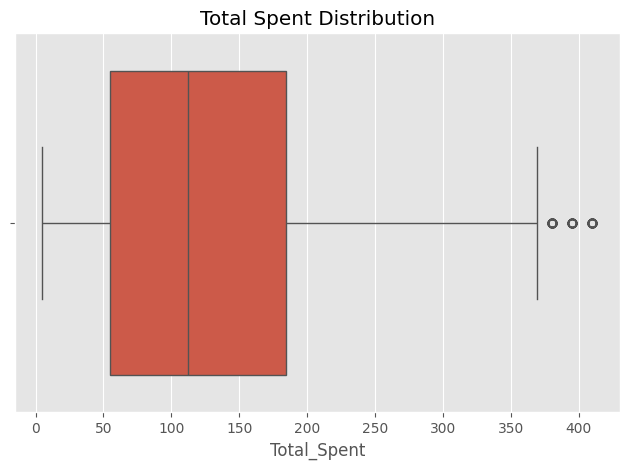

In [65]:
sns.boxplot(x=df_iqr['Total_Spent'])
plt.title("Total Spent Distribution")
plt.tight_layout()
plt.show()

- After removing outliers from **Total_Spent using the IQR method**, outliers in **Price_Per_Unit** were also reduced automatically because both columns are related. This shows that treating key financial columns can indirectly clean related variables

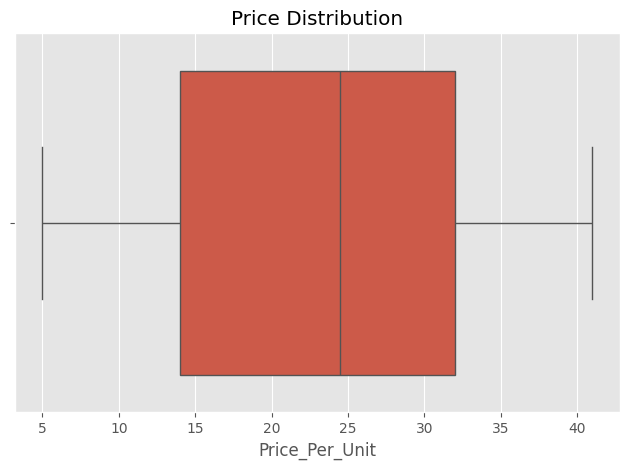

In [66]:
sns.boxplot(x=df_iqr['Price_Per_Unit'])
plt.title("Price Distribution")
plt.tight_layout()
plt.show()

### Comparing Before Vs After Removing Outliers

In [67]:
#BERFORE
df.shape

(10974, 11)

In [68]:
#AFTER
df_iqr.shape

(10399, 11)

- Around 635 Rows were removed

- Before Removing Outliers

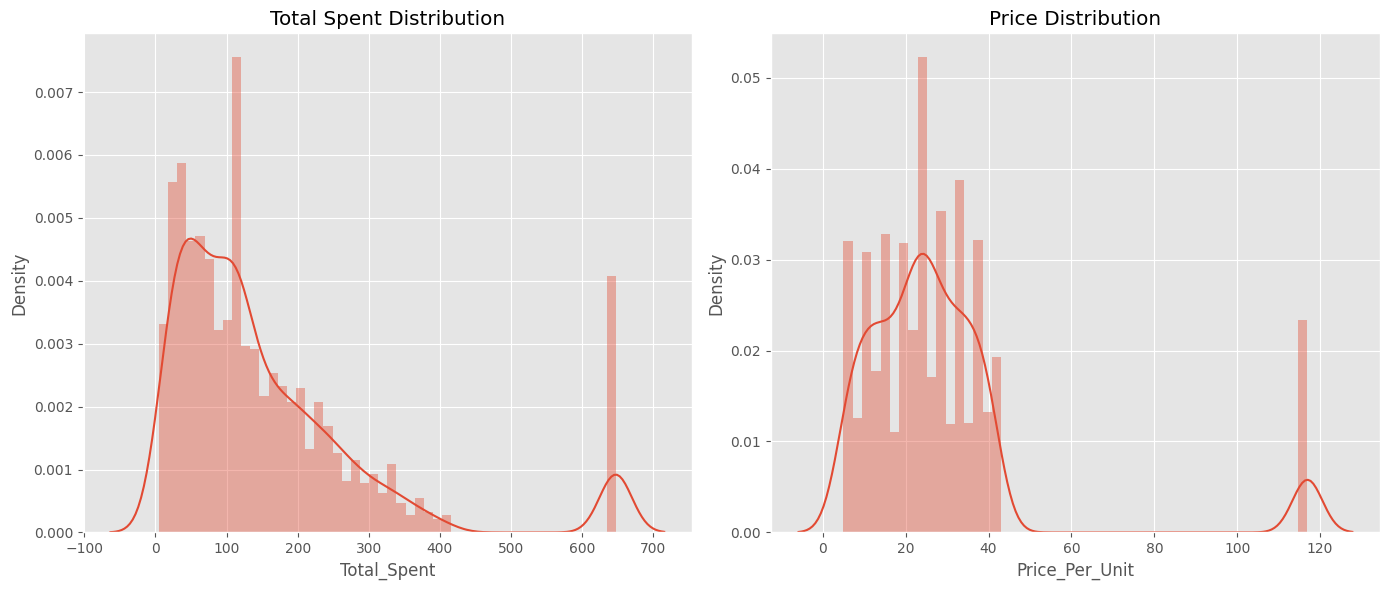

In [69]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(df['Total_Spent'])
plt.title("Total Spent Distribution")

plt.subplot(1,2,2)
sns.distplot(df['Price_Per_Unit'])
plt.title("Price Distribution")

plt.tight_layout()
plt.show()

- After Removing Outliers

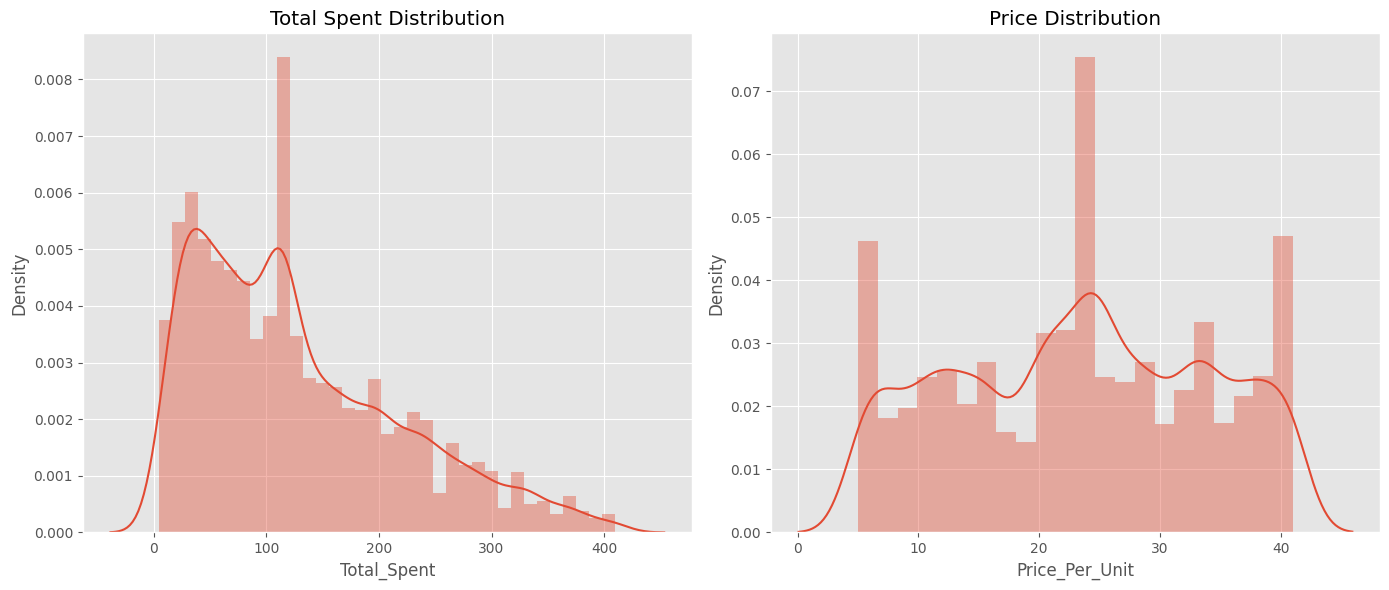

In [70]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(df_iqr['Total_Spent'])
plt.title("Total Spent Distribution")

plt.subplot(1,2,2)
sns.distplot(df_iqr['Price_Per_Unit'])
plt.title("Price Distribution")

plt.tight_layout()
plt.show()

- Around 635 rows were removed due to extreme values, indicating noticeable outliers in the dataset.
- Most remaining data now falls within a more realistic spending and pricing range.
- Removing outliers improves data consistency and statistical accuracy.
- The cleaned dataset is now more reliable for analysis and future modelin

## 🏁CONCLUSION

This project systematically improved dataset quality through structured data cleaning and validation. Missing values were carefully assessed, with fully empty and highly incomplete records removed to preserve meaningful information. Duplicate entries were eliminated to prevent distortion in analysis, and statistical outlier detection techniques were applied to maintain realistic data distribution.

As a result, the dataset became more consistent, reliable, and analytically sound. This cleaning process establishes a strong foundation for accurate exploratory analysis and future modeling tasks, highlighting the critical importance of thorough data preparation before any advanced analytical or machine learning workflows.